# BrainStation Capstone Project
### Project: Prediction of Purchase Time and Quantity by Customer and Product
### Author: Cristhian Lima
### Year: 2024

# Table of Contents
1. [Project Overview](#project-overview)
    - [Introduction](#introduction)
    - [Business Case](#business-case)
    - [Business Problem](#business-problem)
    - [Objectives](#objectives)
    - [Expected Outcome](#expected-outcome)
2. [Dataset](#dataset)
    - [Dataset Gathering](#dataset-gathering)
    - [Data Dictionary](#data-dictionary)
3. [Exploration and Preprocessing](#exploration-and-preprocessing)
    - [Data Cleaning](#data-cleaning)
    - [Exploratory Data Analysis (EDA)](#data-analysis)
    - [Sales Over Time Analysis](#sales-analysis)
    - [Customer Analysis](#customer-analysis)
    - [Product Analysis](#product-analysis)
    - [Correlation Analysis](#correlation-analysis)
4. [Model Approach](#model-dev)
    - [Estimated Purchase Time Calculation per Customer](#avg-projected)
    - [Simple Average Method](#savg-method)
    - [Analysis of Sales Frequency of Products by Customer](#freq-method)
    - [Average sales time and quantity per customer](#[average-sales-time-and-quantity)
    - [Linear Regression for Estimated Purchasing Time](#lr-projected)
[SPRING 3](#spring-3)
5. [Model Improvement](#model-imp)

# **SPRING 1**

# 1. Project Overview <a class="anchor" id="project-overview"></a>

## Introduction <a class="anchor" id="introduction"></a>
Efficient inventory management is a challenge for many businesses, as maintaining the right stock levels is critical to balance supply and demand. Overstocking can lead to increased holding costs and wasted resources, while stockouts can result in lost sales, poor customer satisfaction, and potential damage to the company’s reputation.

This project aims to answer the following two questions:

 1. **What is the average purchase time for each customer?** With this information, we can estimate when the customer will make their next purchase.
 2. **What is the average purchase quantity of the items?** This information allows us to anticipate the inventory quantities needed to cover future customer orders.

## Business Case <a class="anchor" id="business-case"></a>
For security reasons, the company's name is omitted.

The company is located in the USA and specializes in the manufacturing and printing of foodservice products.

Its main lines of business include: napkins, cups, bags, and TechnoLiners.

This company has requested to calculate when is the next customer purchasing (in term of days) and the quantity products to be purchased.


## Business Problem <a class="anchor" id="business-problem"></a>
The lack of accurate demand forecasting can lead to misinformed purchasing and replenishment decisions, creating inefficiencies in the supply chain.

## Objectives <a class="anchor" id="objectives"></a>
1. **Data Exploration and Preprocessing:** Clean and prepare the dataset, ensuring that it is suitable for predictive analysis by addressing missing data, inconsistencies, and outliers.

2. **Sales Pattern Analysis:** Perform Exploratory Data Analysis (EDA) to identify patterns, in sales, which will help in understanding demand behavior.

3. **Model Development:** Use machine learning and time-series forecasting techniques to predict future demand and establish optimal stock levels for the business.

4. **Evaluation and Optimization:** Evaluate the model’s performance using appropriate metrics, refine the model to improve accuracy, and provide actionable insights for stock management.

## Expected Outcome: <a class="anchor" id="expected-outcome"></a>
By the end of the project, we expect to answer the two main questions:
 1. **What is the average purchase time for each customer?**
 2. **What is the average purchase quantity of the items?**

By creating a predictive tool that will enable the business to optimize its inventory levels, reduce costs, and improve overall supply chain efficiency.

The insights gained from this model will support data-driven decision-making and enhance the company’s ability to meet customer demands with more precision.

# 2. Dataset <a class="anchor" id="dataset"></a>

## Dataset Gathering <a class="anchor" id="dataset-gathering"></a>

The dataset consists of information gathered from customer's ERP SAP Business One ERP.

Below is a query and table that describes the fields used in the invoice query, providing detailed information about each column, its purpose, and the table it originates from.

```
SELECT
    T0."DocEntry",  -- Internal Id Invoice
    T0."DocNum",    -- Invoice Number
    T0."CardCode",  -- Customer Code
    T0."CardName",  -- Customer Name
    T2."GroupCode", -- Customer Group Code
    T4."GroupName", -- Customer Group Name
    T2."Country",  -- Customer Country Code
    T5."Name" "CountryName", -- Customer Country Name
    T2."State1",  -- Customer State Code
    T6."Name" "StateName", -- Customer State Name
    T2."City",   -- Customer City
    T0."DocDate", -- Invoice Date
    T0."SlpCode", -- Sale Employee Code
    T0."DocCur", -- Invoice currency
    T0."DocRate", -- Invoice currency rate
    T0."DocTotal", -- Invoice Total in Main Currency USD
    T0."DocTotalFC", -- Invoice Total in Foreign Currency
    T1."ItemCode", -- Item Code
    T3."ItmsGrpCod", -- Item Group Code
    T7."ItmsGrpNam", -- Item Group Name
    T3."ItemName", -- Item Description
    T1."Quantity", -- Quantity sold
    T1."WhsCode", -- Warehouse code
    T1."StockPrice", -- Cost of item in Invoice
    T1."PriceBefDi", -- Price before discount Invoiced
    T1."DiscPrcnt",  -- Discount per item in Invoice
    T1."Price",  -- Price after discount Invoiced
    T1."LineTotal" -- Total per Line in Main Currency USD (quatity per price after discount)

FROM "OINV" T0
INNER JOIN "INV1" T1 ON T0."DocEntry" = T1."DocEntry"
INNER JOIN "OCRD" T2 ON T0."CardCode" = T2."CardCode"
INNER JOIN "OITM" T3 ON T1."ItemCode" = T3."ItemCode"
INNER JOIN "OCRG" T4 ON T2."GroupCode" = T4."GroupCode"
INNER JOIN "OCRY" T5 ON T2."Country" = T5."Code"
LEFT JOIN "OCST" T6 ON T2."State1" = T6."Code"
INNER JOIN "OITB" T7 ON T3."ItmsGrpCod" = T7."ItmsGrpCod"

WHERE
    T0."DocType" = 'I' -- Only Item Invoices
	AND T0."CANCELED"='N' -- Documents are not canceled
    AND T3."InvntItem"='Y' -- Only inventory items
ORDER BY T0."DocNum"

```

## Data Dictionary <a class="anchor" id="data-dictionary"></a>

| Column            | Description                                                                                         | Table   |
|-------------------|-----------------------------------------------------------------------------------------------------|---------|
| `T0."DocEntry"`   | Unique identifier for the invoice. This is the internal ID used in the system to reference the invoice. | OINV    |
| `T0."DocNum"`     | Invoice number assigned to the document. This is the number typically used for referencing invoices in reports and communications. | OINV    |
| `T0."CardCode"`   | Code that identifies the customer in the system. This is a unique identifier for each customer.       | OINV    |
| `T0."CardName"`   | Name of the customer as registered in the system. It corresponds to the company's or individual’s official name. | OINV    |
| `T2."GroupCode"`  | Code representing the customer group, used to categorize customers into different segments (e.g., retail, wholesale, etc.). | OCRD    |
| `T4."GroupName"`  | Descriptive name of the customer group, providing a more user-friendly label for the group code.     | OCRG    |
| `T2."Country"`    | Code representing the country of the customer, often using ISO standards for country codes.          | OCRD    |
| `T5."Name"`       | Full name of the country corresponding to the country code, giving a human-readable version of the customer's location. | OCRY    |
| `T2."State1"`     | Code representing the state or province of the customer, used in regions where such administrative divisions exist. | OCRD    |
| `T6."Name"`       | Full name of the state or province, corresponding to the state code. Provides a human-readable location identifier. | OCST    |
| `T2."City"`       | City where the customer is located, providing more granular geographic detail of the customer's address. | OCRD    |
| `T0."DocDate"`    | Date the invoice was created or issued. This is the official date of the transaction for accounting and auditing purposes. | OINV    |
| `T0."SlpCode"`    | Code that identifies the sales employee responsible for the invoice. This is used for tracking sales by representative. | OINV    |
| `T0."DocCur"`     | Currency in which the invoice was issued (e.g., USD, EUR), specifying the monetary unit for the transaction. | OINV    |
| `T0."DocRate"`    | Exchange rate applied if the invoice currency differs from the company’s main currency, showing the conversion factor. | OINV    |
| `T0."DocTotal"`   | Total amount of the invoice in the company's main currency (USD), including all charges and taxes. | OINV    |
| `T0."DocTotalFC"` | Total amount of the invoice in the foreign currency (if applicable), providing the total cost in the currency used for the transaction. | OINV    |
| `T1."ItemCode"`   | Code that uniquely identifies the item being sold, as registered in the inventory system.            | INV1    |
| `T3."ItmsGrpCod"` | Code representing the item group, categorizing items into different segments (e.g., electronics, clothing, etc.). | OITM    |
| `T7."ItmsGrpNam"` | Descriptive name of the item group, providing a human-readable label for the item group code.        | OITB    |
| `T1."ItemName"` | Description of the item, typically containing the item’s full name and additional details. | OITM    |
| `T1."Quantity"`   | Number of units sold of the item. Represents the quantity of the product included in the invoice.     | INV1    |
| `T1."WhsCode"`    | Code representing the warehouse from which the item is being shipped or managed. Helps track inventory across multiple locations. | INV1    |
| `T1."StockPrice"` | Cost of the item at the time of the invoice, based on stock valuation methods (e.g., FIFO, LIFO), used for cost analysis. | INV1    |
| `T1."PriceBefDi"` | Price of the item before any discounts are applied. This is the base price charged for the product.   | INV1    |
| `T1."DiscPrcnt"`  | Percentage discount applied to the item on the invoice. Represents the discount provided to the customer for that specific item. | INV1    |
| `T1."Price"`      | Final price of the item after the discount is applied. This is the amount that will be invoiced to the customer. | INV1    |
| `T1."LineTotal"`  | Total amount for the line item in the invoice, calculated as `Quantity * Price`, representing the total charge for that product in the invoice currency. | INV1    |

# 3. Exploration and Preprocessing <a class="anchor" id="exploration-and-preprocessing"></a>

## Data Cleaning <a class="anchor" id="data-cleaning"></a>

In [2]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset
df = pd.read_csv('SalesSapFl.csv', delimiter=';')
df.head()

,DocEntry,DocNum,CardCode,CardName,GroupCode,GroupName,Country,CountryName,State1,StateName,...,ItmsGrpCod,ItmsGrpNam,ItemName,Quantity,WhsCode,StockPrice,PriceBefDi,DiscPrcnt,Price,LineTotal
0,460,"13,953",C00311,360 Proaction,100,Customers,US,USA,FL,Florida,...,114,Rush Fees,Rush/Expedite Fee,1,FP,50,50,0,50,50
1,460,"13,953",C00311,360 Proaction,100,Customers,US,USA,FL,Florida,...,104,Napkins,"Beverage Napkin, 2 PLY, 10 X 10 White, 1/4 Fol...",1,FP,127.78,108,0,108,108
2,462,"13,955",C00256,Rodman Think Branding LLC,100,Customers,US,USA,FL,Florida,...,104,Napkins,"Beverage Napkin: 10x10, 1-Ply, 1/4 Fold. Kraft...",5,FP,70,42.13,0,42.13,210.65
3,463,"13,956",C00239,"Promos4Sale.com, LLC",100,Customers,US,USA,FL,Florida,...,104,Napkins,"Beverage Napkin: 2-Ply 10x10, 1/4 Fold. Black ...",10,FP,63.077,55.26,0,55.26,552.6
4,468,"13,960",C00216,Packaging Direct,100,Customers,US,USA,FL,Florida,...,104,Napkins,"Beverage Napkin, 2 PLY, 10 X 10 White, 1/4 Fol...",6,FP,49.63,29.21,0,29.21,175.26


In [4]:
df.shape

(16724, 28)

Our original dataframe has a total of 16724 rows and 28 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16724 entries, 0 to 16723
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DocEntry     16724 non-null  object
 1   DocNum       16724 non-null  object
 2   CardCode     16724 non-null  object
 3   CardName     16724 non-null  object
 4   GroupCode    16724 non-null  int64 
 5   GroupName    16724 non-null  object
 6   Country      16724 non-null  object
 7   CountryName  16724 non-null  object
 8   State1       16724 non-null  object
 9   StateName    16724 non-null  object
 10  City         16724 non-null  object
 11  DocDate      16724 non-null  object
 12  SlpCode      16724 non-null  int64 
 13  DocCur       16724 non-null  object
 14  DocRate      16724 non-null  int64 
 15  DocTotal     16724 non-null  object
 16  DocTotalFC   16724 non-null  int64 
 17  ItemCode     16724 non-null  object
 18  ItmsGrpCod   16724 non-null  int64 
 19  ItmsGrpNam   16724 non-nu

As you can see, the columns do not show data in null, however, after reviewing some columns, we found that the '?' symbol exists, wich represent a Null Value.

Below we will identify in which columns we have this symbol in order to replace it:

In [6]:
# Check if the '?' symbol is present in some cell of the DataFrame
contains_simbol = df.applymap(lambda x: '?' in str(x))

# Show columns that contain '?'
columns_simbol = contains_simbol.any()

# Show columns that contain '?'
print(columns_simbol[columns_simbol == True].index.tolist())

['State1', 'StateName', 'City', 'DiscPrcnt']


<ipython-input-6-3bc1a0cc6ebb>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  contains_simbol = df.applymap(lambda x: '?' in str(x))


Now we will create a function that will take 2 parameters, first parameter a list of columns that are string and second parameter, and second parameter takes the columns of type int and converts them to zero.

In [7]:
# Function to remove '?' from a list of columns

def removing_sign(df, columns_string=None, columns_int=None):
    if columns_string:
        for col in columns_string:
            df[col] = df[col].replace('?', '')

    if columns_int:
        for col in columns_int:
            df[col] = df[col].replace('?', 0)

    return df

In [8]:
# Setting the list of columns with '?' to be used in the function:
columns_string=['State1','StateName','City']
columns_int=['DiscPrcnt']

In [9]:
# Applying the function to columns with '?' simbol
df = removing_sign(df, columns_string = columns_string, columns_int = columns_int)

Checking again for '?' sign in the columns

In [10]:
# Check if the '?' symbol is present in some cell of the DataFrame
contains_simbol = df.applymap(lambda x: '?' in str(x))

# Show columns that contain '?'
columns_simbol = contains_simbol.any()

# Show columns that contain '?'
print(columns_simbol[columns_simbol == True].index.tolist())

<ipython-input-10-3bc1a0cc6ebb>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  contains_simbol = df.applymap(lambda x: '?' in str(x))


[]


Now we have our df without '?' simbol.

Now, after exploring the type of the columns, is required to modify the datatype, transforming from object to int, float, or date, and optionally strips whitespace from column names.

For doing that, the next function cleans the columns indicated, considering the following parameters.

Parameters:
* df (pd.DataFrame): The DataFrame containing the data.
* columns_to_int (list): List of column names to be converted to int.
* columns_to_float (list): List of column names to be converted to float.
* columns_to_date (list): List of column names to be converted to datetime.
* clean_column_names (bool): Whether to strip leading/trailing whitespace from column names, by default True.

Additionally, from the outset we already know that the DocEntry and DocNum columns are the document number, both the internal id and the invoice number.

Despite being numeric, these columns will not be used to perform operations, so we will convert them into strings, and avoid any confusion when using them in any model.

Finally, the funtion returns as result, a DataFrame with the specified columns converted and column names cleaned.

In [11]:
# Function to tranform columns from object to int float, datetype, and remove spaces if exist

def columns_to_convert(df, columns_to_int=None, columns_to_float=None, columns_to_date=None, clean_column_names=True):

    # Clean column names by stripping whitespace
    if clean_column_names:
        df.columns = df.columns.str.strip()

    # Convert columns that are just internal id's like 'DocEntry', 'DocNum' to string and remove commas
    for col in ['DocEntry', 'DocNum', 'GroupCode', 'SlpCode', 'ItmsGrpCod']:
        if col in df.columns:
            df[col] = df[col].astype(str).str.replace(',', '')

    # Convert columns to int
    if columns_to_int:
        for col in columns_to_int:
            if df[col].dtype == 'object':
                df[col] = df[col].str.replace(',', '').astype(int)

    # Convert columns to float
    if columns_to_float:
        for col in columns_to_float:
            if df[col].dtype == 'object':
                df[col] = df[col].str.replace(',', '').astype(float)

    # Convert columns to date
    if columns_to_date:
        for col in columns_to_date:
            df[col] = pd.to_datetime(df[col])

    return df

In [12]:
# Setting the list of columns with to be used in the function with the aim of being transformer from Object to int, float or date:
columns_to_float=['DocTotal', 'DocTotalFC', 'LineTotal', 'StockPrice', 'PriceBefDi', 'Price', 'Quantity']
columns_to_date=['DocDate']

In [13]:
# Applying the function to all the columns to be transformed
df = columns_to_convert(df, columns_to_float = columns_to_float, columns_to_date = columns_to_date)

<ipython-input-11-936df1452ef4>:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])


We proceed to review the data type of each column again, where we can verify that they have already changed from Object to int64, datetime64 and float64.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16724 entries, 0 to 16723
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DocEntry     16724 non-null  object        
 1   DocNum       16724 non-null  object        
 2   CardCode     16724 non-null  object        
 3   CardName     16724 non-null  object        
 4   GroupCode    16724 non-null  object        
 5   GroupName    16724 non-null  object        
 6   Country      16724 non-null  object        
 7   CountryName  16724 non-null  object        
 8   State1       16724 non-null  object        
 9   StateName    16724 non-null  object        
 10  City         16724 non-null  object        
 11  DocDate      16724 non-null  datetime64[ns]
 12  SlpCode      16724 non-null  object        
 13  DocCur       16724 non-null  object        
 14  DocRate      16724 non-null  int64         
 15  DocTotal     16724 non-null  float64       
 16  DocT

In [15]:
# statistical description of the data
df.describe()

,DocDate,DocRate,DocTotal,DocTotalFC,Quantity,StockPrice,PriceBefDi,Price,LineTotal
count,16724,16724.0,16724.000000,16724.0,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000
mean,2022-03-21 20:04:40.698397440,1.0,2599.214500,0.0,27.463406,52.287262,90.381184,90.353261,1759.158359
min,2018-08-31 00:00:00,1.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-08-25 18:00:00,1.0,752.600000,0.0,5.000000,26.773750,50.904250,50.815000,519.600000
50%,2022-06-30 00:00:00,1.0,1323.365000,0.0,10.000000,48.064500,78.373000,78.370000,914.680000
75%,2023-11-30 00:00:00,1.0,2625.000000,0.0,25.000000,66.626750,116.338000,116.312250,1740.250000
max,2024-10-18 00:00:00,1.0,318220.000000,0.0,6364.000000,1789.100000,1926.600000,1926.600000,318220.000000
std,NaN,0.0,5842.992402,0.0,99.866909,35.915454,58.039073,58.042585,4527.354544


This statistical analysis describes a dataset of 16,724 sales records. The transaction dates range from August 31, 2018, to October 18, 2024.

The average sales values indicate that the average number of items sold per transaction is 27.46 units. Sales fluctuate widely, with quantities ranging from one unit sold to 6,364.

The analysis also reveals significant variation in prices. The average price before discount is 90.38, but it can reach up to 1,926.60, reflecting the diversity of items in the transactions. The median of the total price of the lines (LineTotal) is 914.68, indicating that 50% of the transactions are below this value, while 25% of the transactions have a value below 519.60.



# 4. Exploratory Data Analysis (EDA) <a class="anchor" id="data-analysis"></a>

**IMPORTANT NOTE:** In our analysis, it is important to consider that there are two columns for totals: "LineTotal" and "DocTotal".

* "LineTotal" represents the total per line in the document (Price * Quantity).
* "DocTotal" corresponds to the total amount of the document, including taxes and other non-inventory services such as freight, fees, etc. The total invoiced is duplicated by the number of rows in each invoice.

To analyze the total invoiced by customer, we will consider the "DocTotal" column, whereas for evaluating sales by inventory based on monetary value, we will use the "LineTotal" column.

Next, an exploratory analysis will be conducted to understand the trends and patterns in the data:

Sales Analysis:

* Analyze how sales are distributed over time.
* Customer Analysis: Total sold per customers over time.
* Product Analysis: Most sold products and trends.
* Correlations: Analyze the correlations with sales to identify which factors influence demand.

## General Sales Over Time Analysis per Year <a class="anchor" id="sales-analysis"></a>

In [16]:
# Creating a new dataframe, grouping by 'DocNum' and keep a single value for DocTotal
df_unique_doctotal = df.groupby(['DocNum', 'CardCode','CardName','DocDate'], as_index=False)['DocTotal'].first()
df_unique_doctotal.head()

,DocNum,CardCode,CardName,DocDate,DocTotal
0,13953,C00311,360 Proaction,2018-08-31,358.00
1,13955,C00256,Rodman Think Branding LLC,2018-08-31,210.65
2,13956,C00239,"Promos4Sale.com, LLC",2018-08-31,707.60
3,13960,C00216,Packaging Direct,2018-08-31,175.26
4,13961,C00152,Hospitality Purchasing LLC,2018-08-31,4431.60


In [17]:
# Table showing the  total sales per year
sales_per_year = df.groupby([df_unique_doctotal['DocDate'].dt.to_period('Y')])['DocTotal'].sum().reset_index()
sales_per_year['DocDate'] = sales_per_year['DocDate'].dt.to_timestamp()
sales_per_year.head(10)

,DocDate,DocTotal
0,2018-01-01,1017369.38
1,2019-01-01,3560004.77
2,2020-01-01,2260954.59
3,2021-01-01,4292876.89
4,2022-01-01,5372206.63
5,2023-01-01,10082851.62
6,2024-01-01,8985666.41


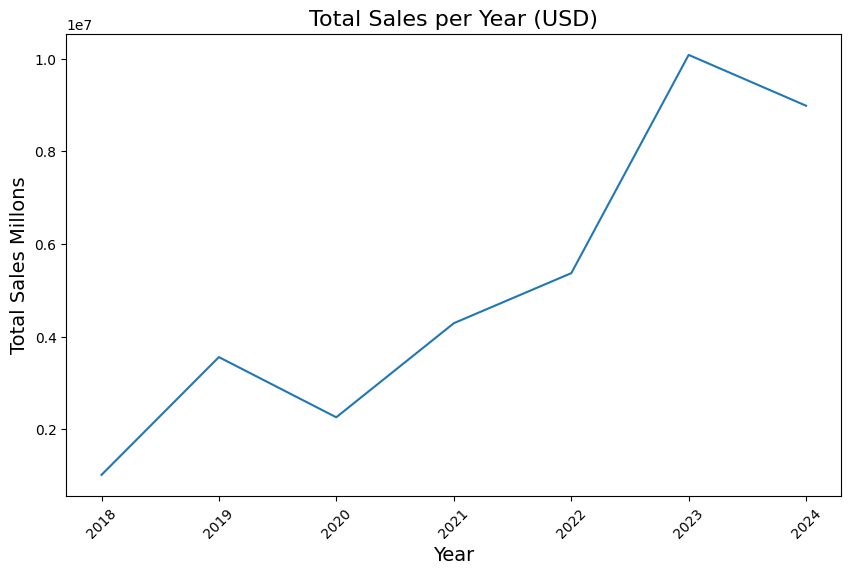

In [18]:
# Total Sales per Year Graph
plt.figure(figsize=(10, 6))
plt.plot(sales_per_year['DocDate'], sales_per_year['DocTotal'])
plt.title('Total Sales per Year (USD)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Sales Millons', fontsize=14)
plt.xticks(rotation=45)
plt.show()

This chart shows the evolution of sales over the years. It can be observed that from 2018 to 2024, sales are increasing progressively.

In 2023 the tend reaches its peak in billing.
2024 is still in progress and with almost 3 months remaining until the end of the year, the invoiced value is very close to reaching its maximum level in 2023.

## Customer Analysis <a class="anchor" id="customer-analysis"></a>

The objective of this analysis is to identify the main customers, track their purchasing trends over time, and select the Top 5 customers that will be used for predictions in our model

### Total sales per customer

In [19]:
# Total Sales per customer
sales = df_unique_doctotal.groupby(['CardCode','CardName'])['DocTotal'].sum().reset_index()
salescust = sales.sort_values(by='DocTotal', ascending=False).head(5)
salescust

,CardCode,CardName,DocTotal
351,C00706,"Clark Associates, Inc.",2126590.49
170,C00335,US Foods,1511294.92
60,C00129,General Hotel & Restaurant Supply Corp,1380795.36
38,C00086,Dade Paper,1344885.63
222,C00421,Bunzl R3 Philadelphia,1291921.58


The previous table shows the top 5 clients with the highest sales during the 6 years.

The following graph shows the total sales per customer.

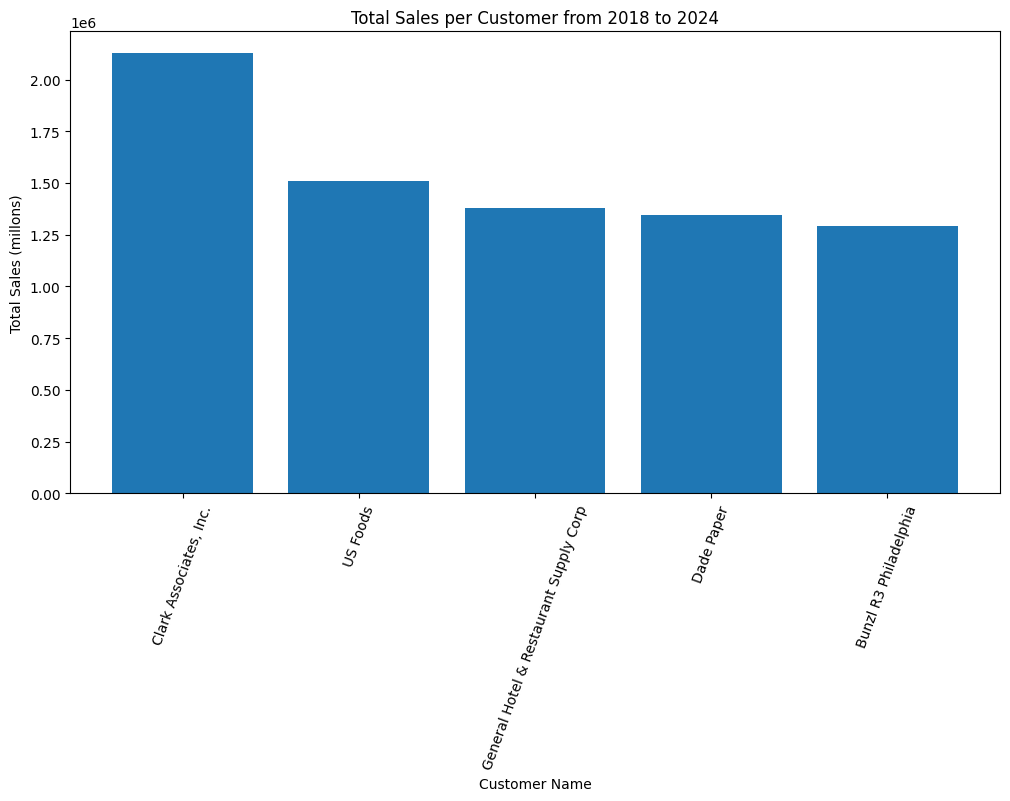

In [20]:
# Bar Chart - Total sales per customer
plt.figure(figsize=(12, 6))
plt.bar(salescust['CardName'], salescust['DocTotal'])
plt.xlabel('Customer Name')
plt.ylabel('Total Sales (millons)')
plt.title('Total Sales per Customer from 2018 to 2024')
plt.xticks(rotation=70)
plt.show()

### Sales Evolution by Time per Customer

In [21]:
# Filtering 'df_unique_doctotal' by clients who are on salescust
# New DF called 'df_top5_customers'
df_top5_customers = df_unique_doctotal[df_unique_doctotal['CardCode'].isin(salescust['CardCode'])]
df_top5_customers['CardCode'].unique()

array(['C00086', 'C00129', 'C00335', 'C00421', 'C00706'], dtype=object)

In [22]:
# Sales evolution by time per customer
# Creating sales dataframe by year and customer
sales_customer_time = df_top5_customers.groupby([df_top5_customers['DocDate'].dt.to_period('Y'), 'CardName'])['DocTotal'].sum().reset_index()
sales_customer_time.head()

,DocDate,CardName,DocTotal
0,2018,Dade Paper,66119.83
1,2018,General Hotel & Restaurant Supply Corp,72724.26
2,2018,US Foods,1177.32
3,2019,Bunzl R3 Philadelphia,150416.89
4,2019,Dade Paper,214566.35


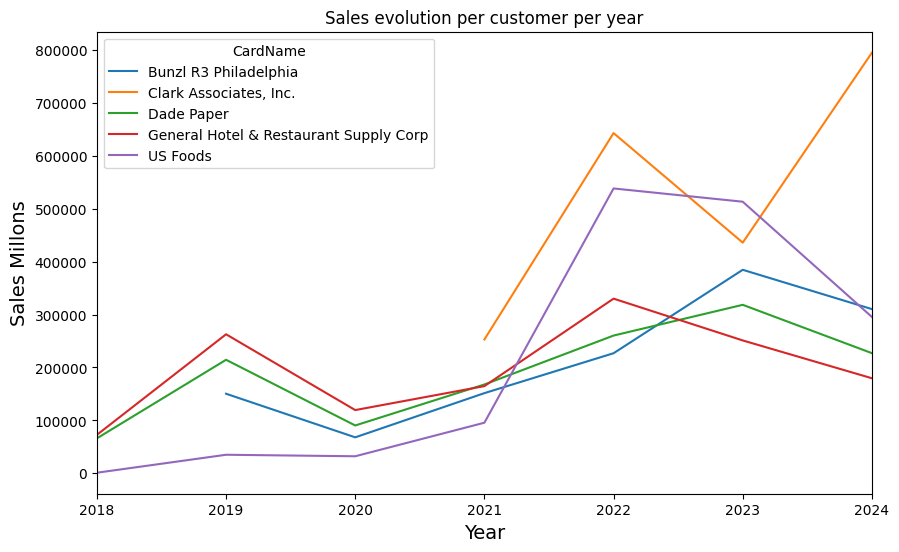

In [23]:
# Modifying dataframe form clients as columns and dates as rows
sales_customer_time = df_top5_customers.groupby([df_top5_customers['DocDate'].dt.to_period('Y'), 'CardName'])['DocTotal'].sum().unstack()

# Graph of the evolution of sales by clients and per year
sales_customer_time.plot(figsize=(10, 6), title='Sales evolution per customer per year')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales Millons', fontsize=14)
plt.show()

In [24]:
sales_customer_time

CardName,Bunzl R3 Philadelphia,"Clark Associates, Inc.",Dade Paper,General Hotel & Restaurant Supply Corp,US Foods
DocDate,,,,,
2018,NaN,NaN,66119.83,72724.26,1177.32
2019,150416.89,NaN,214566.35,262761.25,35126.91
2020,68036.04,NaN,90449.53,119552.87,32273.10
2021,151560.60,252926.67,167894.08,164826.05,95669.58
2022,226958.60,642942.40,260337.15,330118.67,538298.69
2023,384611.58,435950.13,318424.72,251129.98,513242.65
2024,310337.87,794771.29,227093.97,179682.28,295506.67


We can see that 'Clark Associates, Inc.' in 2022 and so far in 2024, is the top-performing customer, being a relatively new client with three years of tenure.

Next is the customer 'US Foods,' which has shown sales activity from 2018 to the present, demonstrating growth in its transactions, reaching its peak in 2022, maintaining it in 2023, and showing a sharp decline so far in 2024.

The next three customers exhibit very similar trends in their purchasing amounts over time.

## Product Analysis <a class="anchor" id="product-analysis"></a>

Next, an analysis of product sales from various aspects:

* Total sales by product: Identify the products that generate the highest total sales.
* Sales frequency by product: Determine how many times each product has been sold (number of times it appears on invoices).
* Sales by product group: Analyze sales grouped by product category.
* Temporal trends by product: Examine the evolution of product sales over time.

### Top-selling products by total sales amount

In [25]:
# Top 10 sold products by amount
sales_product = df.groupby(['ItemCode', 'ItemName'])['LineTotal'].sum().reset_index()
sales_product = sales_product.sort_values(by='LineTotal', ascending=False)
top10_item_sales = sales_product.head(5)
top10_item_sales

,ItemCode,ItemName,LineTotal
127,215X178WHBDC23.0M,"Dinner Napkin: 2-Ply 15x17, 1/8 Fold. Premium ...",1393775.89
344,CPKACP161.0M-1,"CUP, CLEAR PLASTIC, 16 OZ, CASE PACK 1.0M CUP,...",1173199.79
87,210X104WHBDC13.0M,"Beverage Napkin, 2 PLY, 10 X 10 White, 1/4 Fol...",1157774.75
390,CPSOCP161.0M-1,"CUP, CLEAR PLASTIC, 16 OZ, CASE PACK 1.0M - CU...",960120.69
345,CPKACP161.0M-2,"CUP, CLEAR PLASTIC, 16 OZ, CASE PACK 1.0M CUP,...",664569.00


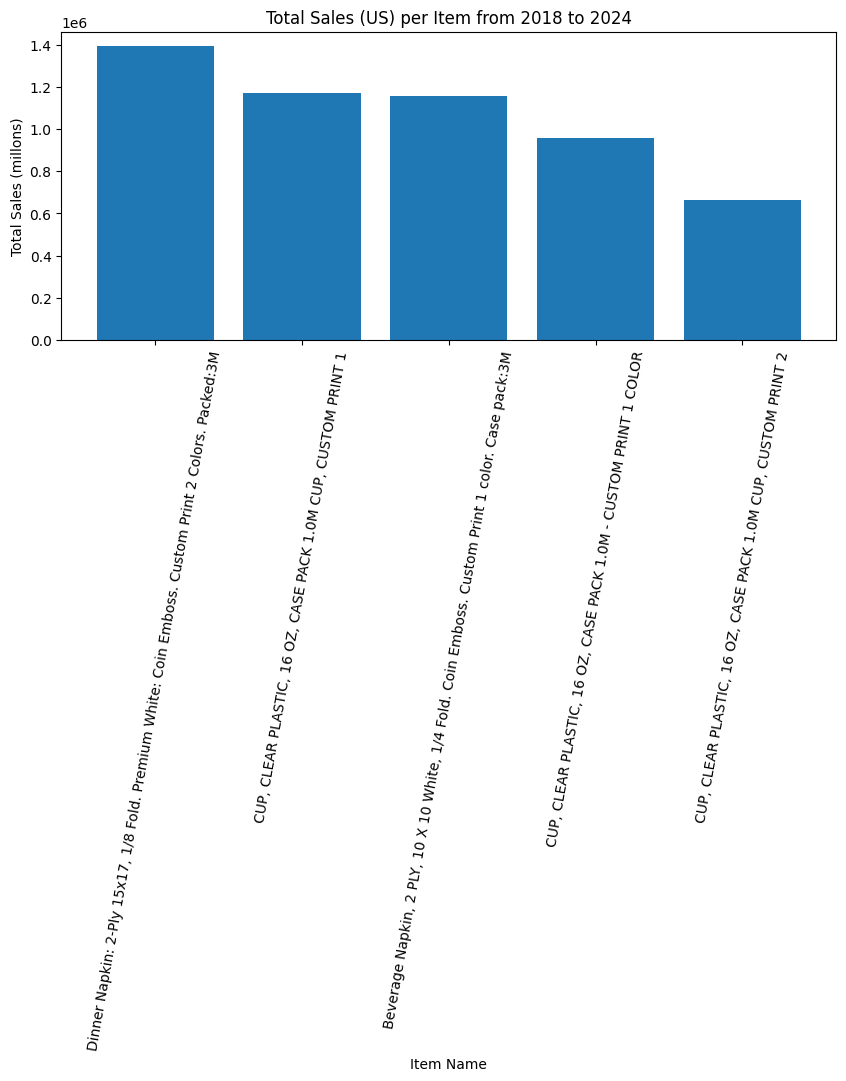

In [26]:
# Bar Chart - Total sales per item
plt.figure(figsize=(10, 4))
plt.bar(top10_item_sales['ItemName'], top10_item_sales['LineTotal'])
plt.xlabel('Item Name')
plt.ylabel('Total Sales (millons)')
plt.title('Total Sales (US) per Item from 2018 to 2024')
plt.xticks(rotation=80)
plt.show()

### Top-selling products by quantity sold

In [27]:
# Top 5 sold products by quantity
sales_productqt = df.groupby(['ItemCode', 'ItemName'])['Quantity'].sum().reset_index()
sales_productqt = sales_productqt.sort_values(by='Quantity', ascending=False)
top10_item_salesqt = sales_productqt.head(5)
top10_item_salesqt

,ItemCode,ItemName,Quantity
61,210X104BKBDCP1.0M,"Beverage Napkin: 2-Ply 10x10, 1/4 Fold. Black ...",40749.0
87,210X104WHBDC13.0M,"Beverage Napkin, 2 PLY, 10 X 10 White, 1/4 Fol...",30637.0
127,215X178WHBDC23.0M,"Dinner Napkin: 2-Ply 15x17, 1/8 Fold. Premium ...",18276.0
23,110X104WHBDOP4.0M,"Cocktail Napkin: 1-Ply 10x10, 1/4 Fold, Regula...",12613.0
344,CPKACP161.0M-1,"CUP, CLEAR PLASTIC, 16 OZ, CASE PACK 1.0M CUP,...",11900.0


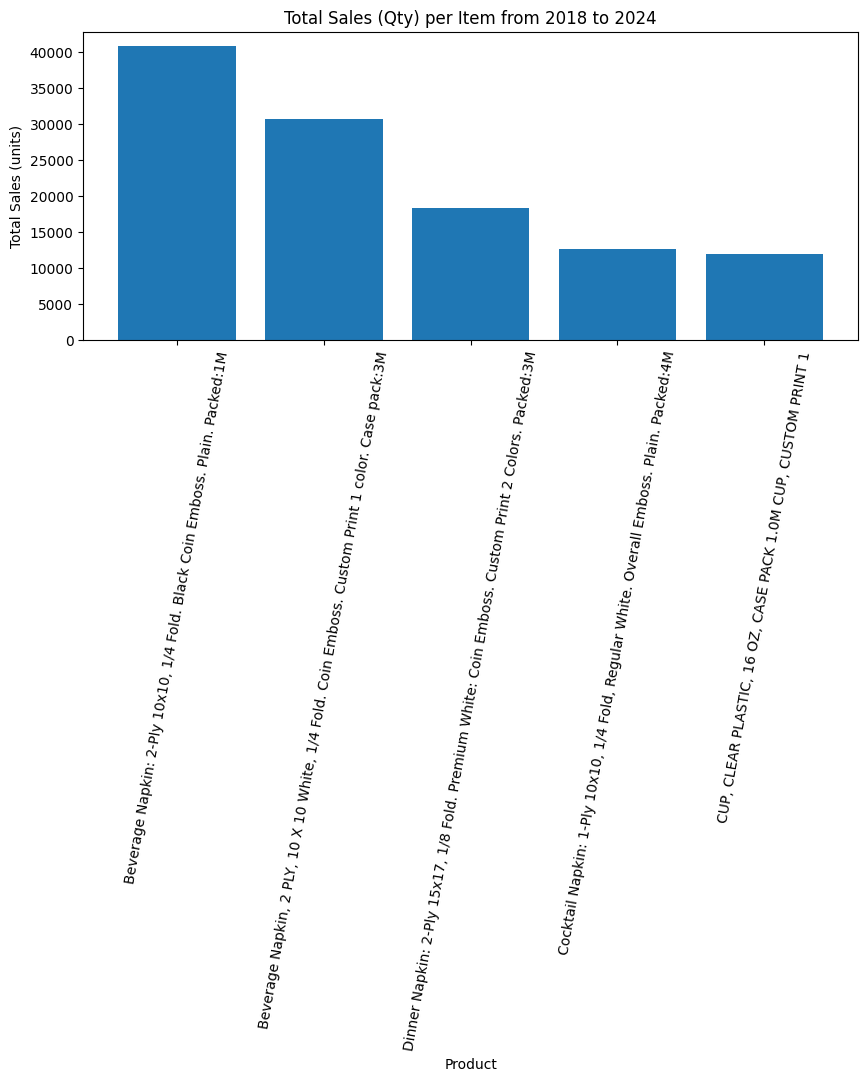

In [28]:
# Bar Chart - Top 10 sold products by quantity
plt.figure(figsize=(10, 4))
plt.bar(top10_item_salesqt['ItemName'], top10_item_salesqt['Quantity'])
plt.xlabel('Product')
plt.ylabel('Total Sales (units)')
plt.title('Total Sales (Qty) per Item from 2018 to 2024')
plt.xticks(rotation=80)
plt.show()

In the previous two charts, we can observe the total sales by revenue and by quantity.

Some of the top products appear in both charts, indicating that they not only lead in quantities sold but also have a significant impact on the company's revenue.

### Sales by product group

In [29]:
# Total sales by product group
sales_by_itemgroup = df.groupby(['ItmsGrpCod', 'ItmsGrpNam'])['LineTotal'].sum().reset_index()
sales_by_itemgroup = sales_by_itemgroup.sort_values(by='LineTotal', ascending=False)
sales_by_itemgroup.head()

,ItmsGrpCod,ItmsGrpNam,LineTotal
2,104,Napkins,13196152.64
3,105,Cups,12148147.80
4,106,Technopaper,2792448.27
1,101,Bags,1128410.81
7,113,Other Finish Product,112567.25


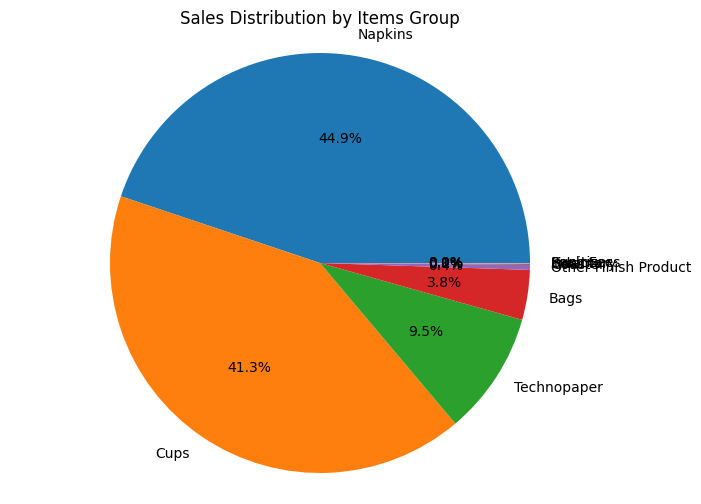

In [30]:
# Pie Chart - Percentage of sales per item group
plt.figure(figsize=(8, 6))
plt.pie(sales_by_itemgroup['LineTotal'], labels=sales_by_itemgroup['ItmsGrpNam'], autopct='%1.1f%%')
plt.title('Sales Distribution by Items Group')
plt.axis('equal')
plt.show()

In [31]:
sales_by_itemgroup['ItmsGrpNam'].unique()

array(['Napkins', 'Cups', 'Technopaper', 'Bags', 'Other Finish Product',
       'Coaster', 'Lids', 'Inventory', 'Sanitizer', 'Rush Fees'],
      dtype=object)

The highest concentration of sales is centered on products from Napkins family at 44%, Cups at 41%, and the rest is divided among the rest items family.

### Temporal trends by product and Total Amount Sold

In [32]:
# Grouping by product code and description and add up total sales
sales_per_product = df.groupby(['ItemCode', 'ItemName'])['LineTotal'].sum().reset_index()
top_5_products = sales_per_product.sort_values(by='LineTotal', ascending=False).head(5)
top_5_products

,ItemCode,ItemName,LineTotal
127,215X178WHBDC23.0M,"Dinner Napkin: 2-Ply 15x17, 1/8 Fold. Premium ...",1393775.89
344,CPKACP161.0M-1,"CUP, CLEAR PLASTIC, 16 OZ, CASE PACK 1.0M CUP,...",1173199.79
87,210X104WHBDC13.0M,"Beverage Napkin, 2 PLY, 10 X 10 White, 1/4 Fol...",1157774.75
390,CPSOCP161.0M-1,"CUP, CLEAR PLASTIC, 16 OZ, CASE PACK 1.0M - CU...",960120.69
345,CPKACP161.0M-2,"CUP, CLEAR PLASTIC, 16 OZ, CASE PACK 1.0M CUP,...",664569.00


In [33]:
# Filter the original DataFrame to include only the top 5 best-selling products
df_top_5_products = df[df['ItemCode'].isin(top_5_products['ItemCode'])]

In [63]:
# Grouping by date (year) and product, and add total sales
sales_top_5_time = df_top_5_products.groupby([df['DocDate'].dt.to_period('Y') ,'ItemCode'])['LineTotal'].sum().unstack()

# Show first results to verify
sales_top_5_time

ItemCode,210X104WHBDC13.0M,215X178WHBDC23.0M,CPKACP161.0M-1,CPKACP161.0M-2,CPSOCP161.0M-1
DocDate,,,,,
2018,34747.70,2178.90,NaN,NaN,35270.58
2019,158545.11,146704.06,NaN,NaN,125804.09
2020,88597.45,65296.40,NaN,NaN,91722.76
2021,116775.05,137088.71,NaN,NaN,175610.78
2022,203041.52,232254.09,102541.77,33210.72,345782.42
2023,265661.20,427722.15,530645.53,256509.54,110603.11
2024,290406.72,382531.58,540012.49,374848.74,75326.95


This graph shows the sales trend of each of the top 5 products year by year.

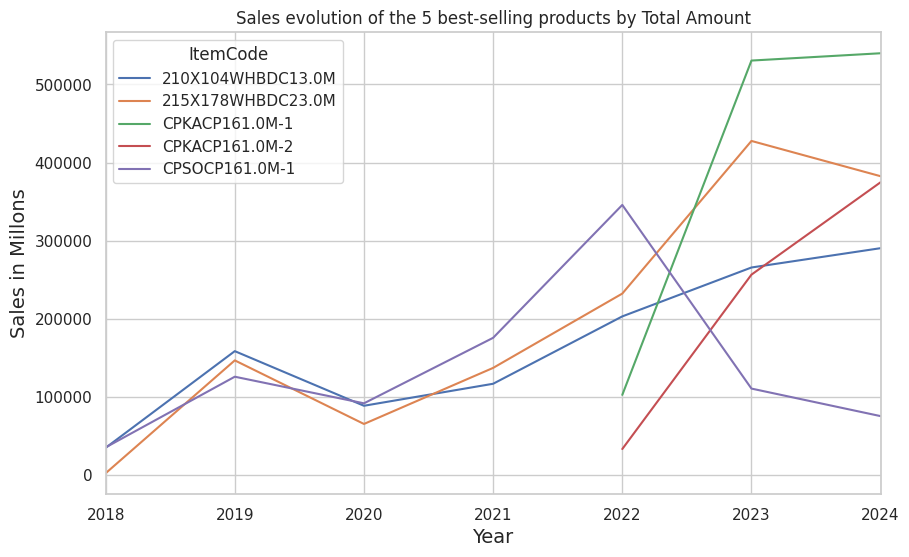

In [64]:
# Graph the evolution of sales of the 5 best-selling products by Total
sales_top_5_time.plot(figsize=(10, 6), title='Sales evolution of the 5 best-selling products by Total Amount')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales in Millons', fontsize=14)
plt.show()

The five best-selling products show an increase in sales starting from 2018, reaching their peak in 2023 for the 2 best products.

## Correlation Analysis <a class="anchor" id="correlation-analysis"></a>

We are interested in understanding which variables influence the quantity demanded.

For this analysis, the following variables are considered:

* PriceBefDi: Price before discount
* DiscPrcnt: Discount
* Price: Price after discount
* StockPrice: Item Cost
* Quantity: Quantity Invoiced

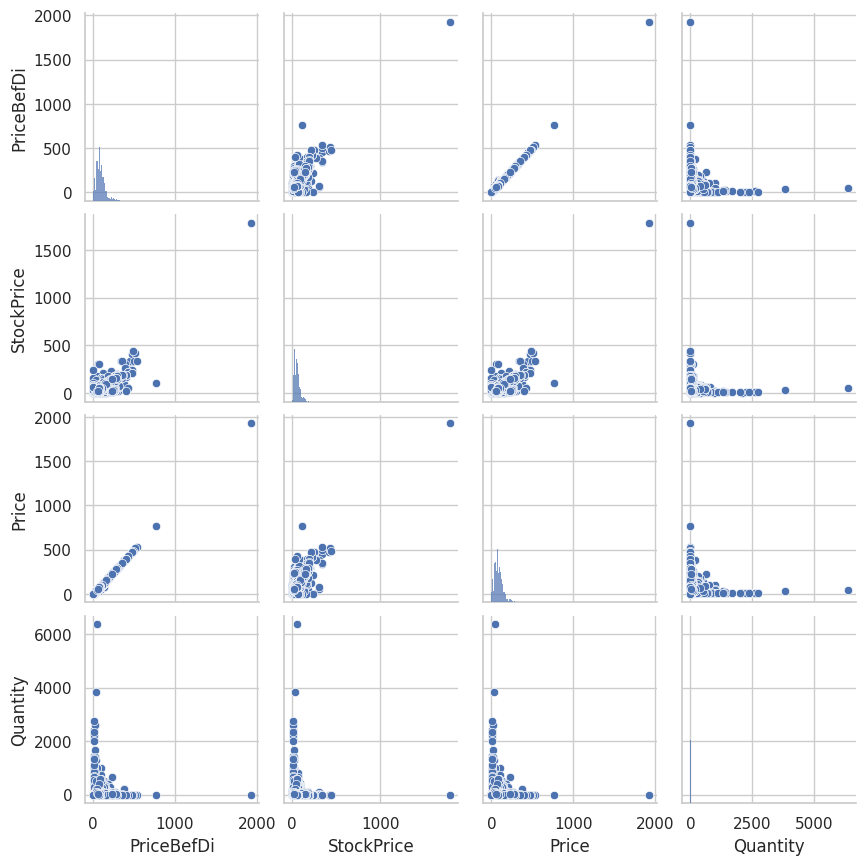

In [36]:
# Correlation Matrix Plot
sns.set(style='whitegrid', context='notebook')
cols = ['DiscPrcnt', 'PriceBefDi', 'StockPrice', 'Price', 'Quantity']
sns.pairplot(df[cols], height=2.2)

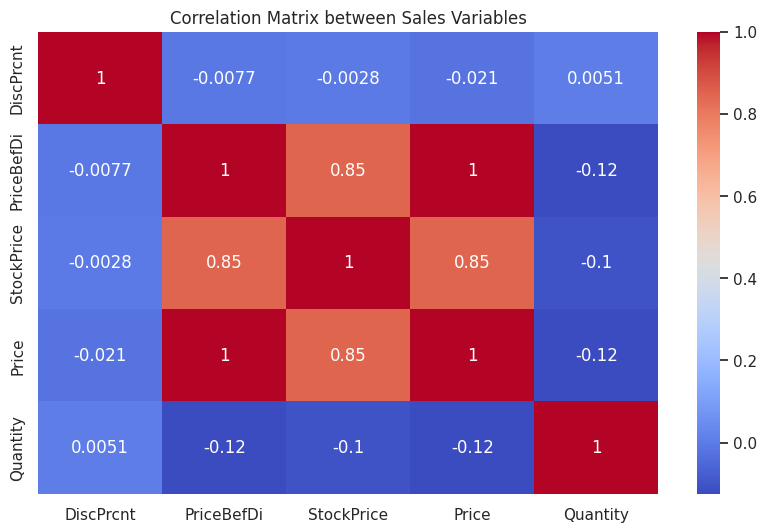

In [65]:
## Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[cols].corr(), cbar= True,  cmap='coolwarm', annot= True)
plt.title('Correlation Matrix between Sales Variables')
plt.show()

The chart shows a correlation matrix between the variables DiscPrcnt, PriceBefDi, StockPrice, Price, and Quantity.

1. **High correlation between PriceBefDi, StockPrice, and Price:**

These three variables are strongly correlated (0.98 to 1.0), indicating that as one value increases, the others do as well, almost proportionally. This makes sense, as the price before discount (PriceBefDi) and the final price (Price) are closely related, and the item cost (StockPrice) also influences the sale price.

2. **Low correlation between Quantity and other variables:**

The quantity sold (Quantity) is not strongly correlated with other variables such as Price, StockPrice, or DiscPrcnt. This might suggest that the quantities sold are not heavily dependent on prices or discounts, which could require deeper analysis.

3. **Weak relationship between DiscPrcnt and other variables:**

The discount percentage (DiscPrcnt) does not have a strong correlation with the other variables, indicating that discounts don't have a significant impact on price or the quantity sold in this particular case.

# **SPRING 2**

# 4. Modeling Approach <a class="anchor" id="model-dev"></a>

Now we will begin exploring ways to answer our two main questions:

What is the average purchase time for each customer?
What is the average purchase quantity of the items?
For this analysis, we will focus only on answering these questions for the top 5 customers by sales amount.

We will start by identifying the average purchase time. To do this, we will determine the purchase frequency of each customer and try to estimate the expected purchase interval:

We'll begin by creating a new dataframe with data exclusively from the top 5 customers:

In [66]:
# FFilter the original DataFrame to include only the top 5 best-selling customers
df_main_clients = df_top5_customers.copy(deep=True)
df_main_clients.head()

,DocNum,CardCode,CardName,DocDate,DocTotal
14,13974,C00086,Dade Paper,2018-09-10,1467.0
20,13983,C00086,Dade Paper,2018-09-12,418.5
37,14005,C00129,General Hotel & Restaurant Supply Corp,2018-09-13,2200.0
38,14006,C00129,General Hotel & Restaurant Supply Corp,2018-09-13,1050.0
39,14007,C00129,General Hotel & Restaurant Supply Corp,2018-09-13,1485.0


## Estimated Purchase Time Calculation per Customer <a class="anchor" id="avg-projected"></a>


## Simple Average Method <a class="anchor" id="savg-method"></a>
We will begin by calculating a simple average of the time between each purchase made by each customer.

This will provide an initial estimate of the time interval between each customer's purchases.

We will proceed as follows:

* Sort purchases by customer and date.
* Calculate the difference between purchase dates: For each customer, calculate the difference between the date of each purchase and the previous purchase.
* Average the interval: Compute the average of those differences for each customer.

The result will be the average purchase time in days for each customer.

In [67]:
# Ordering per customer and date
df_main_clients = df_main_clients.sort_values(by=['CardName', 'DocDate'])

# Calculate the difference between purchases (in days) for each customer
df_main_clients['avg_days_between_purchase'] = df_main_clients.groupby('CardCode')['DocDate'].diff().dt.days

# Calculate the average time between purchases per customer
avg_days_per_client = df_main_clients.groupby('CardName')['avg_days_between_purchase'].mean().reset_index()

# Showing the result with the average time of purchasing per customer
avg_days_per_client.head()

,CardName,avg_days_between_purchase
0,Bunzl R3 Philadelphia,42.704545
1,"Clark Associates, Inc.",0.708383
2,Dade Paper,4.422619
3,General Hotel & Restaurant Supply Corp,4.067890
4,US Foods,5.584184


Although this method is a good starting point, there are disadvantages to this approach:


* **Variability in purchase patterns:** It assumes regular purchases, which does not reflect well for customers with irregular or seasonal buying habits.

* **Does not detect trends:** It does not capture if a customer is changing their purchase frequency or if external factors are influencing their behavior.

* **Customers with few purchases:** Customers with only two transactions may have an unrepresentative average.

**Possible improvements:**

**Median instead of average:** The median could be more robust against outliers, as it is less affected by unusually long or short intervals between purchases.

**Weighted calculation:** Weight the time between purchases based on the quantity or value of transactions, giving more importance to significant purchases.

**More advanced models:** Time series analysis techniques, such as ARIMA model, can help identify more complex patterns, trends, or seasonality in purchase data.

We will now include additional variables that may influence customer purchasing patterns, including the quantity purchased or the monetary value of the transactions.

To achieve this, we will create a new DataFrame that only includes the following columns:

* DocNum: Invoice Number
* CardCode: Customer Code
* CardName: Customer Name
* DocDate: Invoice Date
* ItemCode: Product Code
* ItemName: Product Name
* Quantity: Quantity Sold
* Price: Selling Price
* LineTotal: Total Sale Amount for each item in each document

This new DataFrame will contain information solely from the top five customers.

In [68]:
# Creating a new DataFrame filtering by the main clients and selecting the necesary columns for our model
cols_model = ['DocNum','CardCode','CardName','DocDate','ItemCode','ItemName','Quantity','Price','LineTotal']
df_custom_items = df[df['CardCode'].isin(df_top5_customers['CardCode'])][cols_model]
df_custom_items.head()

,DocNum,CardCode,CardName,DocDate,ItemCode,ItemName,Quantity,Price,LineTotal
18,13974,C00086,Dade Paper,2018-09-10,215X178IVBDC13.0M,"Dinner Napkin: 2-Ply 15x17, 1/8 Fold. Ivory Co...",20.0,71.600,1432.0
26,13983,C00086,Dade Paper,2018-09-12,TPPPKR09.00x12.004,TechnoPaper. Kraft 09.00inches by 12.00inches ...,2.0,194.251,388.5
43,14005,C00129,General Hotel & Restaurant Supply Corp,2018-09-13,110X104WHBDC26.0M,"Beverage Napkin: 1-Ply 10x10, 1/4 Fold, Regula...",100.0,22.000,2200.0
44,14006,C00129,General Hotel & Restaurant Supply Corp,2018-09-13,110X104WHBDC26.0M,"Beverage Napkin: 1-Ply 10x10, 1/4 Fold, Regula...",25.0,42.000,1050.0
45,14007,C00129,General Hotel & Restaurant Supply Corp,2018-09-13,110X104WHBDC26.0M,"Beverage Napkin: 1-Ply 10x10, 1/4 Fold, Regula...",50.0,29.700,1485.0


In [69]:
# Verifying that the new df contains only the filter Top 5 clients
df_custom_items['CardCode'].unique()

array(['C00086', 'C00129', 'C00335', 'C00421', 'C00706'], dtype=object)

## Analysis of Sales Frequency of Products by Customer <a class="anchor" id="freq-method"></a>

The aim of this analysis is to count how many times each customer has purchased each product.

To achieve this, we will group the data by customer (CardCode) and product (ItemCode). This will create unique combinations of customer-product pairs, allowing us to count the quantities purchased for each product.

We will focus on retaining only the top product purchased by each of the five customers.

In [70]:
# Grouping by customer 'CardCode' and product 'ItemCode' to count how many times a customer has purchased a product
product_purchase_frequency = df_custom_items.groupby(['CardCode', 'ItemCode'])['DocNum'].count().reset_index()

# Rename the column 'DocNum' for clarity as it is now a count
product_purchase_frequency.columns = ['CardCode', 'ItemCode', 'sales_count']

# Count of Products purchased per each customer
product_purchase_frequency.head()

,CardCode,ItemCode,sales_count
0,C00086,110X104KRBDC14.0M,1
1,C00086,110X104KRBDC24.0M,3
2,C00086,110X104KRBDC26.0M,22
3,C00086,110X104WHBDC14.0M,1
4,C00086,110X104WHBDC210.M,3


In [71]:
# Sorting by customer and number of product sales in descending order
product_purchase_frequency = product_purchase_frequency.sort_values(['CardCode', 'sales_count'], ascending=[True, False])

# Selecting the most sold product by each customer
most_frequent_products = product_purchase_frequency.groupby('CardCode').first().reset_index()
most_frequent_products

,CardCode,ItemCode,sales_count
0,C00086,210X104WHBDC13.0M,141
1,C00129,110X104WHBDC16.0M,91
2,C00335,210X104WHBDC13.0M,28
3,C00421,215X178WHBDC23.0M,28
4,C00706,CPCHCP161.0M-1,374


## Calculate the average sales time and quantity purchased per item and per customer <a class="anchor" id="average-sales-time-and-quantity"></a>

To improve our estimated purchase time and quantity purchased, we will now consider the purchase time for the top 5 customers, focusing on the most purchased product by each customer.

In [72]:
# New df only with Top 5 clientes and Top 5 items per customer
df_top_clients_items = df[df['CardCode'].isin(df_top5_customers['CardCode'])]

In [73]:
# Create a DataFrame with the top 5 clients and all their items
#df_top_clients_items = df[df['CardCode'].isin(df_top_clients_items['CardCode'])]

# Sort by customer, item and date
df_top_clients_items = df_top_clients_items.sort_values(by=['CardCode', 'ItemCode', 'DocDate'])

# Calculate the difference in days between purchases of the same item by the same customer
df_top_clients_items['days_between'] = df_top_clients_items.groupby(['CardCode', 'ItemCode'])['DocDate'].diff().dt.days

# Calculate the average time between purchases per customer and item
avg_days_per_top_client_item = df_top_clients_items.groupby(['CardCode', 'ItemCode']).agg({
    'days_between': 'mean',
    'Quantity': 'mean'
}).reset_index()

# Rename columns for clarity
avg_days_per_top_client_item.columns = ['CardCode', 'ItemCode', 'avg_days_between_purchases', 'avg_quantity_purchased']

# Filter only the items that are in most_frequent_products (top products)
filtered_avg_days = avg_days_per_top_client_item[avg_days_per_top_client_item['ItemCode'].isin(most_frequent_products['ItemCode'])]

# Show the final filtered result
filtered_avg_days.head()

,CardCode,ItemCode,avg_days_between_purchases,avg_quantity_purchased
17,C00086,210X104WHBDC13.0M,15.557143,47.262411
24,C00086,215X178WHBDC23.0M,NaN,34.000000
108,C00129,110X104WHBDC16.0M,24.188889,81.329670
123,C00129,210X104WHBDC13.0M,39.860000,38.921569
176,C00335,210X104WHBDC13.0M,67.407407,21.107143


This table shows us the average quantities purchased and the average purchase time for the top 5 customers and their main products.

However, an issue is arising with the filter for the products in the 'most_frequent_products' DataFrame. As a temporary workaround, we will remove the rows with items that do not match.

In [74]:
# List of indexes to delete
index_to_drop = [24, 123, 182, 284]

# Delete the rows with the specified indexes
filtered_avg_days = filtered_avg_days.drop(index_to_drop)

Showing the final result with the time and estimated purchase quantity for each of the Top 5 customers and their items

In [75]:
# Final Table with Avg of days between purchase and quantity purchase
filtered_avg_days

,CardCode,ItemCode,avg_days_between_purchases,avg_quantity_purchased
17,C00086,210X104WHBDC13.0M,15.557143,47.262411
108,C00129,110X104WHBDC16.0M,24.188889,81.329670
176,C00335,210X104WHBDC13.0M,67.407407,21.107143
287,C00421,215X178WHBDC23.0M,69.592593,530.928571
311,C00706,CPCHCP161.0M-1,1.134048,7.048128


Up to this point, we have applied a simple average calculation to estimate the time between purchases for each customer. We started by calculating the overall average time between purchases, but then refined the approach by including the product in the calculation. This allowed us to be more precise in analyzing the purchase frequency per customer for each specific product. With this method, we obtained the average number of days between purchases and the average quantity purchased by each customer for their top products.

This approach enabled us to predict when a customer might make their next purchase of a given product and better understand their buying patterns. Additionally, we conducted a more detailed analysis by filtering the data to focus only on the top 5 customers and their most purchased products, which allowed us to target the analysis on the most relevant items.

However, this method has some disadvantages:

* It does not capture variability or trends: A simple average does not reflect changes in customer buying behavior over time.
* Limited robustness with sparse data: For customers with few purchases, the frequency calculation may not be representative.
* Assumption of regularity: It assumes the customer follows a regular purchase pattern, which may not be the case, especially with seasonal products or purchases.

## Linear Regression for Estimated Purchasing Time <a class="anchor" id="lr-projected"></a>

In this case, we have applied linear regression to predict the time between purchases for each customer based on characteristics such as the quantity purchased and the price of the item.

The main steps will include:

1. **Data Preparation:** Use the Quantity and Price as the independent variable (X) and 'days_between' as dependent variable (y).
2. **Model Training:** Apply linear regression to the historical data for each product.
3. **Prediction:** Use the fitted model to predict 'days_between'.

This will give us a predicted value of the days of purchase which can be compared with the Current value.


**Step 1:** Prepare the data

We are going to work with sales data between 2012 and 2016, using the years as the independent variable and the quantities sold of the products as the dependent variable.



**Step 2:** Apply Linear Regression

We are going to train the model for each product using LinearRegression from scikit-learn.

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
# Filter the DataFrame to only include items in 'most_frequent_products'
df_filtered_regression = df_top_clients_items[df_top_clients_items['ItemCode'].isin(most_frequent_products['ItemCode'])]

In [81]:
# Searching for Null Vouchers before applying our model
df_filtered_regression[['Quantity', 'Price', 'days_between']].isnull().sum()

,0
Quantity,0
Price,0
days_between,0


In [80]:
# Replacing Null values for '0' in 'days_between' column
df_filtered_regression['days_between'] = df_filtered_regression['days_between'].fillna(0)

<ipython-input-80-d2e1a5d35a8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_regression['days_between'] = df_filtered_regression['days_between'].fillna(0)


In [82]:
# Save 'ItemCode' and 'CardCode' before splitting data
item_codes = df_filtered_regression['ItemCode']
card_codes = df_filtered_regression['CardCode']

# Select the predictor variables and the target (days_between) for the filtered articles
# X = df_filtered_regression[['Quantity']] # Model only with 1 variable
X = df_filtered_regression[['Quantity', 'Price']]  # Model with 2 variable
y = df_filtered_regression['days_between']  # Dependent

# Split the data into training and test sets, keeping 'ItemCode' and 'CardCode'
X_train, X_test, y_train, y_test, item_codes_train, item_codes_test, card_codes_train, card_codes_test = train_test_split(
    X, y, item_codes, card_codes, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions about the test set
y_pred = model.predict(X_test)

In [83]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R2: {r2}')

Mean Squared Error (MSE): 350.4137305761973
R2: 0.13411984295409607


Scatter plot showing the actual days_between values ​​on the y-axis and the predicted (y_pred) values ​​on the x-axis. This will help to compare the actual values agains predicted.

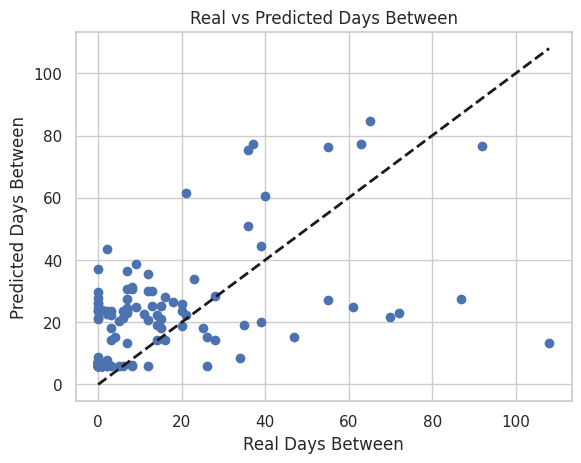

In [84]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Real Days Between')
plt.ylabel('Predicted Days Between')
plt.title('Real vs Predicted Days Between')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  ## line
plt.show()



Residual Chart:

This plot shows the difference between the actual values ​​and the predicted values. This plot is useful for identifying patterns in the residuals, which may indicate that the model is not adequately capturing the relationship between variables.


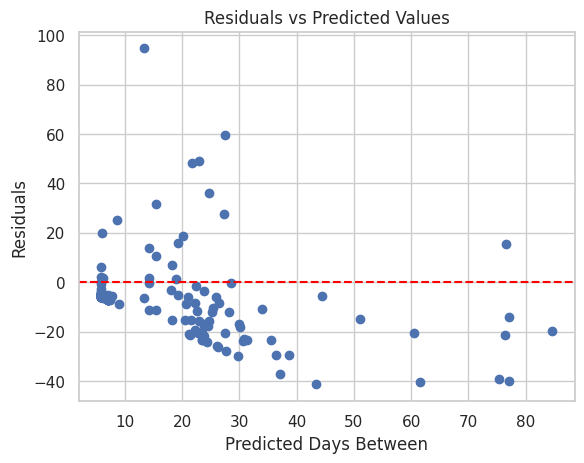

In [85]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Days Between')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.axhline(0, color='red', linestyle='--')  # Line
plt.show()

**Mean Squared Error (MSE): 350.41**
Interpretation: The lower the MSE, the better the model fits the data. A value of 350.41 is relatively high, indicating that the model's predictions tend to deviate significantly from the actual values.

**R-squared (R²): 0.13**
Only 13% of the variability in purchase intervals is being explained by the model. This means the model is not capturing most of the variation in purchase intervals.

**Summary:**
The relatively high MSE and low R² suggest that the current Linear Regression model is not performing optimally in predicting the time between purchases. The model struggles to fit the data and explain the variability in purchase intervals.

# **SPRING 3** <a class="anchor" id="spring3"></a>

# 5. Model Improvement <a class="anchor" id="model-imp"></a>

In this chapter we will keep trying to answer our two questions, using the previous model (Linear Regression), improving the model, applying a cross-validation for training the dataset and searching for more variables that can be representative for our model.

Finally, we will apply an ARIMA model, wich is ideal for time series analysis, which has the potential of detecting seasonal patterns and trends over time.


